In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [56]:
DATA_ROOT = "replay_data_cap"
TASK = "10-10"
OVERLAP = False

ov_string = "-ov" if OVERLAP else ""
task_and_overlap = TASK + ov_string

In [57]:
class_names = os.listdir(f"../WILSON/{DATA_ROOT}/{task_and_overlap}")
images = [f"{cl_name}/images/{img}" for cl_name in class_names for img in os.listdir(f"../WILSON/{DATA_ROOT}/{task_and_overlap}/{cl_name}/images")]
labels = [f"{cl_name}/pseudolabels/{img}" for cl_name in class_names for img in os.listdir(f"../WILSON/{DATA_ROOT}/{task_and_overlap}/{cl_name}/pseudolabels")]

In [17]:
def voc_cmap(N=256, normalized=False):
    def bitget(byteval, idx):
        return ((byteval & (1 << idx)) != 0)

    dtype = 'float32' if normalized else 'uint8'
    cmap = np.zeros((N, 3), dtype=dtype)
    for i in range(N):
        r = g = b = 0
        c = i
        for j in range(8):
            r = r | (bitget(c, 0) << 7-j)
            g = g | (bitget(c, 1) << 7-j)
            b = b | (bitget(c, 2) << 7-j)
            c = c >> 3

        cmap[i] = np.array([r, g, b])

    cmap = cmap/255 if normalized else cmap
    return cmap

class Label2Color(object):
    def __init__(self, cmap):
        self.cmap = cmap

    def __call__(self, lbls):
        return self.cmap[lbls]

l2c = Label2Color(voc_cmap())

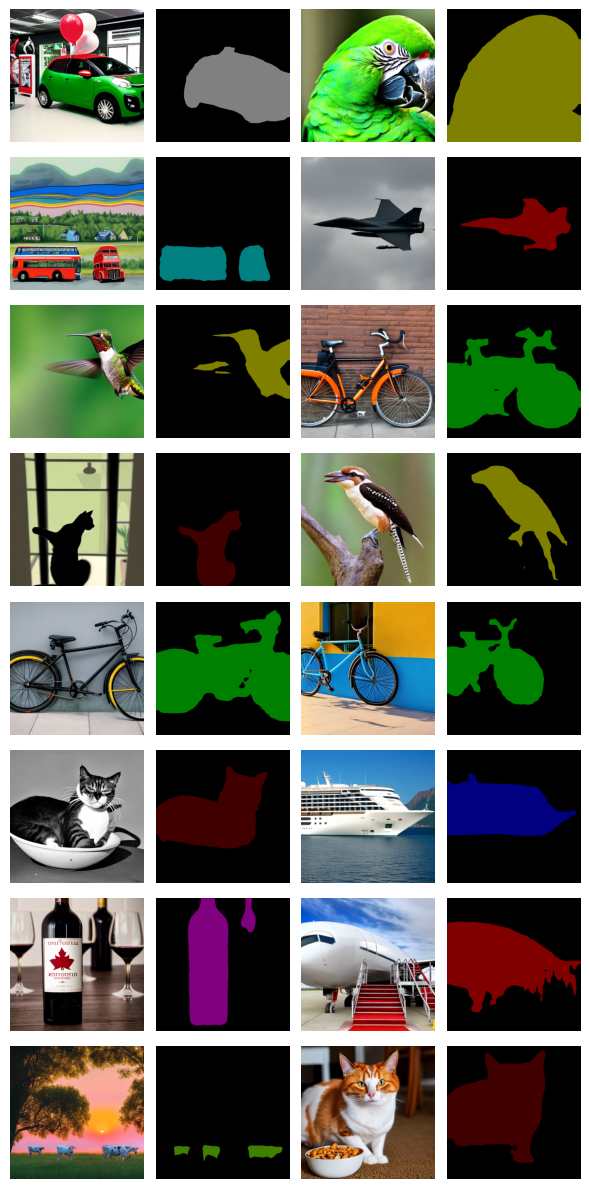

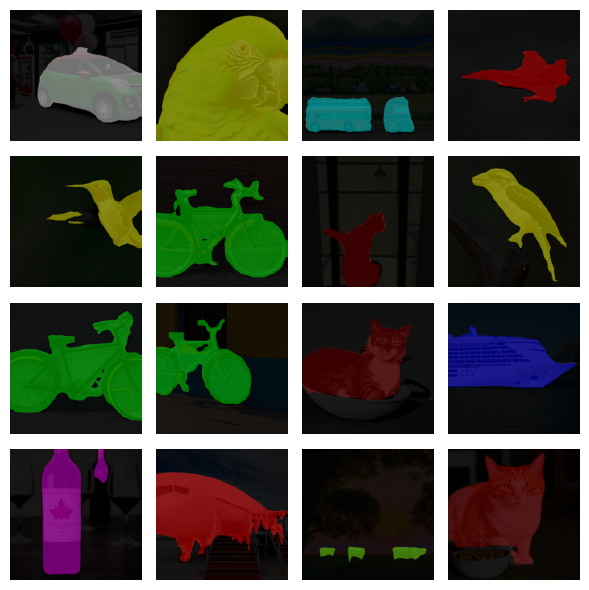

In [51]:
idxs = np.random.choice(len(images), 16, replace=False)
fig, axes = plt.subplots(8, 4, figsize=(6, 12), sharex=True, sharey=True)
for i, idx in enumerate(idxs):
    image = Image.open(f"../WILSON/{DATA_ROOT}/{task_and_overlap}/{images[idx]}").convert("RGB")
    label = Image.open(f"../WILSON/{DATA_ROOT}/{task_and_overlap}/{labels[idx]}")
    axes[(2 * i) // 4, (2 * i) % 4].imshow(image)
    axes[(2 * i) // 4, (2 * i) % 4].axis("off")
    axes[(2 * i) // 4, (2 * i + 1) % 4].imshow(l2c(np.array(label)))
    axes[(2 * i) // 4, (2 * i + 1) % 4].axis("off")
plt.tight_layout()
plt.show()
fig, axes = plt.subplots(4, 4, figsize=(6, 6), sharex=True, sharey=True)
for i, idx in enumerate(idxs):
    image = Image.open(f"../WILSON/{DATA_ROOT}/{task_and_overlap}/{images[idx]}").convert("RGB")
    label = Image.open(f"../WILSON/{DATA_ROOT}/{task_and_overlap}/{labels[idx]}")
    axes[(i) // 4, (i) % 4].imshow(image)
    axes[(i) // 4, (i) % 4].imshow(l2c(np.array(label)), alpha=0.9)
    axes[(i) // 4, (i) % 4].axis("off")
plt.tight_layout()
plt.show()